# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [44]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
replace ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
replace ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_emp

## Import Libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense
from keras import layers
from tensorflow import data as tf_data
from tensorflow.keras.models import Sequential

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [46]:
image_size = (128, 128)
batch_size = 64

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/ParkingLot_Occupation/train",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1382 files belonging to 2 classes.
Using 1106 files for training.
Using 276 files for validation.


## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [47]:
image_size = (128, 128)
batch_size = 64

test_ds = keras.utils.image_dataset_from_directory(
    "/content/ParkingLot_Occupation/test",
    seed=1337,
    image_size=image_size ,
    batch_size=batch_size,
)

Found 344 files belonging to 2 classes.


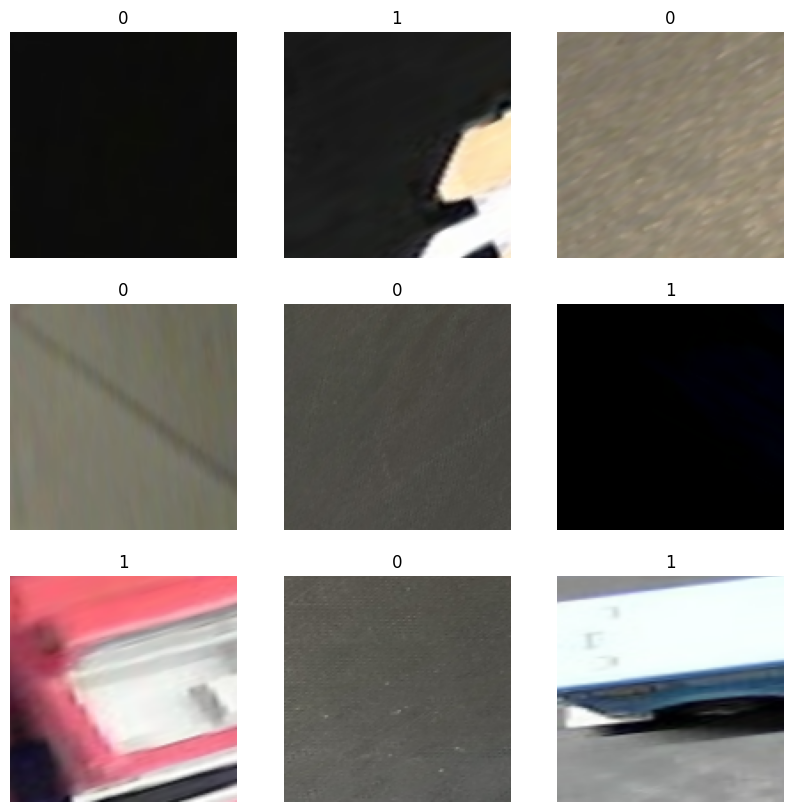

In [57]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [58]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

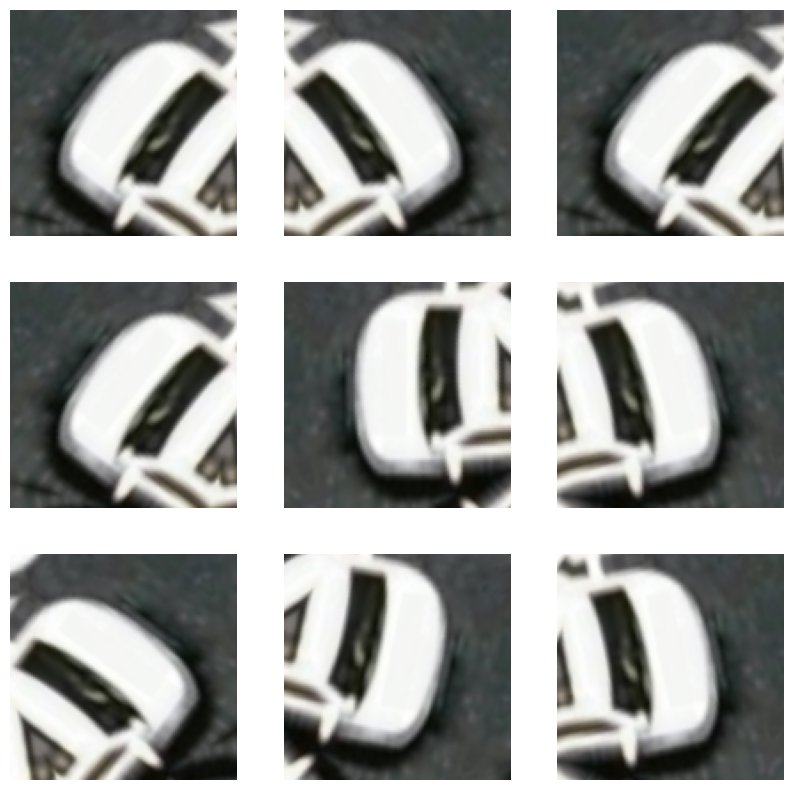

In [59]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [48]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [49]:
model = Sequential([
  #Input layer
  layers.Input(shape=(128, 128, 3)),

  # Normalization and rescale
  layers.Rescaling(1./255.),

  # Conv block
  layers.Conv2D(32, kernel_size=(4, 4), activation='relu'),
  layers.MaxPool2D(2,2),
  layers.Flatten(),

  #Hidden Layers
  layers.Dense(16, activation="relu"),
  layers.Dense(8, activation="relu"),

  # Dropout layer
  tf.keras.layers.Dropout(0.2),

  # Output Layer
  layers.Dense(1, activation="sigmoid")
  ])

In [50]:
# Compile

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │       1,968,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,969,857 (7.51 MB)

 Trainable params: 1,969,857 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [51]:
history = model.fit(train_ds, batch_size=batch_size, epochs=10, validation_data=val_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.5782 - loss: 0.8768 - val_accuracy: 0.8043 - val_loss: 0.4708
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.7690 - loss: 0.4836 - val_accuracy: 0.8841 - val_loss: 0.3748
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.7884 - loss: 0.4027 - val_accuracy: 0.9348 - val_loss: 0.2905
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.8493 - loss: 0.3528 - val_accuracy: 0.9275 - val_loss: 0.2560
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.8645 - loss: 0.3048 - val_accuracy: 0.9420 - val_loss: 0.2453
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8703 - loss: 0.3292 - val_accuracy: 0.9094 - val_loss: 0.2362
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.8629 - loss: 0.3350 - val_accuracy: 0.9457 - val_loss: 0.2778
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.8877 - loss: 0.2927 - val_accuracy: 0.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [52]:
model.evaluate(val_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9166 - loss: 0.2018


[0.18413595855236053, 0.9275362491607666]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

In [53]:
ypred = model.predict(test_ds)
ypred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.3668862 ],
       [0.9998135 ],
       [0.09893162],
       [0.9842609 ],
       [1.        ],
       [0.07472079],
       [0.33055705],
       [0.1099774 ],
       [0.99999976],
       [0.9995414 ],
       [0.9999993 ],
       [0.9999999 ],
       [0.99997294],
       [0.99987435],
       [0.11430729],
       [0.08591673],
       [0.04130065],
       [0.04373709],
       [0.9992648 ],
       [0.05257946],
       [0.21624132],
       [0.99999595],
       [0.10418404],
       [0.03448649],
       [0.04365857],
       [0.9999236 ],
       [0.9882752 ],
       [0.3004954 ],
       [0.08987101],
       [0.99999964],
       [0.9999982 ],
       [0.10506005],
       [0.07020586],
       [0.05416084],
       [0.03356137],
       [0.05435452],
       [0.07967943],
       [0.08952955],
       [0.07823532],
       [0.12431348],
       [0.9998068 ],
       [0.99996746],
       [0.14516938],
       [0.9867431 ],
       [0.05391635],
       [0.15078436],
       [0.7085064 ],
       [0.061

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [54]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

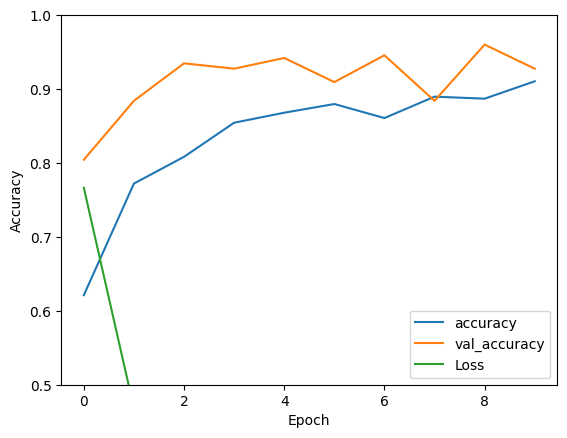

In [55]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Save the Model
Save the trained CNN model for submission.

In [56]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
 - A1/ Resizing: makes it easier and lighter for the performance and faster normalization: makes it between 1 and 255 to because colors are between 1,255 so then it is easier for the machine and ram.  Data augmentation: generate more images from existing images to save time and effort to imporve the accuracy by rotating and rescaling images.

 - A2/ Input layer: for the input. Normalization and rescaling to make it easier for the machine. Conv layer: to apply a small filter to process data of the images as a small block of pixels. Hidden layer: to make each neuron focus on one shape. Dropout: to not make some neurons overfit and get used to some shapes while others lack in accuacy. Output layer: used sigmoid because output must be either of 2 states either 0 or 1.

 - A3/ Used mostly relu to make values between (0, +infinity). and sigmoid for binary crossentropy.

 - A4/ batch size: tested with 64 and found out its good and not so big. number of epochs: found out that 10 is a good starting point and could increase it slightly. optimizer: i choose adam because it is the default of the library and it has proven to be good :).

 - A5/ I used binary_crossentropy because it is a binary classification.

 - A6/ Used Dropout to not overfit some neurons and leave others not learning anything.

 - A7/ I evaluated it and it is aligning with my outcomes and doesnt seem like there is much overfitting or underfitting.

 - A8/ used Accuracy, Val_Accuracy and Loss to plot my results.

 - A9/ I think my model has a good fit of the data. I didnt undertrain it or overtrained it.